# Tutorial No. 1

## 1. Import Packages

In [1]:
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential, Model
import keras.layers as layers
from keras.utils import to_categorical

from keras import optimizers
from keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix
import numpy as np



Using TensorFlow backend.


## 2. Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Change labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train = (y_train[:,0::2] == 1)
y_test = (y_test[:,0::2] == 1)

y_train = np.array([[not item.any() , item.any()] for item in y_train])
y_test = np.array([[not item.any() , item.any()] for item in y_test])

# Print shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000, 2)
y_test shape: (10000, 2)


## 3. Define Parameters 

In [3]:
num_of_clss = 2           # number of classes
hidden_size = 10           # number of neurons in the hidden layer
lr = 1e-3 #usually start from 10^-3                  # learning rate 
beta_1 =  0.9 #momentum speed usually 0.9               # beta 1 - for adam optimizer
beta_2 =  0.95 # divide the values in squre grads usually 0.99              # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer
epochs = 50                # number of epochs how many times iterate over the data 
bs = 128  #usually multiply by 2 16 32 64 128 # bach calc loss update params                 # batch size


## 4. Build 2 Layers Network

In [4]:
#from tensorflow.python.keras import backend as k
from tensorflow.keras.models import Sequential
#from keras.layers import Activation, Dense ,Flatten
from tensorflow.keras.layers import Flatten, Dropout, Activation, Input, Dense, concatenate

in_dim = 28*28

model = Sequential()
model.add(Flatten())
model.add(Dense(hidden_size, input_dim=in_dim))
model.add(Activation('sigmoid'))
model.add(Dense(num_of_clss, input_dim=in_dim))
model.add(Activation('softmax'))


##  5. Train the Model

In [5]:
# define the optimizer and compile the model

adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches
history = model.fit(x_train, y_train, validation_split=0.3, epochs=epochs, batch_size=bs)


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 1s 34us/sample - loss: 0.3952 - accuracy: 0.8280 - val_loss: 0.3092 - val_accuracy: 0.8753
Epoch 2/50
42000/42000 [==============================] - 1s 17us/sample - loss: 0.2887 - accuracy: 0.8839 - val_loss: 0.2638 - val_accuracy: 0.9011
Epoch 3/50
42000/42000 [==============================] - 1s 17us/sample - loss: 0.2628 - accuracy: 0.8976 - val_loss: 0.2529 - val_accuracy: 0.9013
Epoch 4/50
42000/42000 [==============================] - 1s 17us/sample - loss: 0.2410 - accuracy: 0.9077 - val_loss: 0.2475 - val_accuracy: 0.9065
Epoch 5/50
42000/42000 [==============================] - 1s 17us/sample - loss: 0.2250 - accuracy: 0.9150 - val_loss: 0.2439 - val_accuracy: 0.9059
Epoch 6/50
42000/42000 [==============================] - 1s 17us/sample - loss: 0.2216 - accuracy: 0.9174 - val_loss: 0.2302 - val_accuracy: 0.9144
Epoch 7/50
42000/42000 [==============================] 

## 6. Visualize

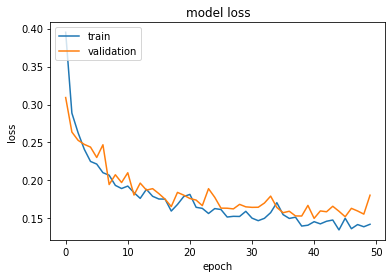

In [6]:
# plot train and validation loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show(); plt.close()


## 7. Model Evaluation

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test loss: 0.1862531854867935
test accuracy: 0.9283


## 8. Predict on Test Set

Normalized confusion matrix
[[93.1217974   6.8782026 ]
 [ 7.47056435 92.52943565]]
[[4725  349]
 [ 368 4558]]


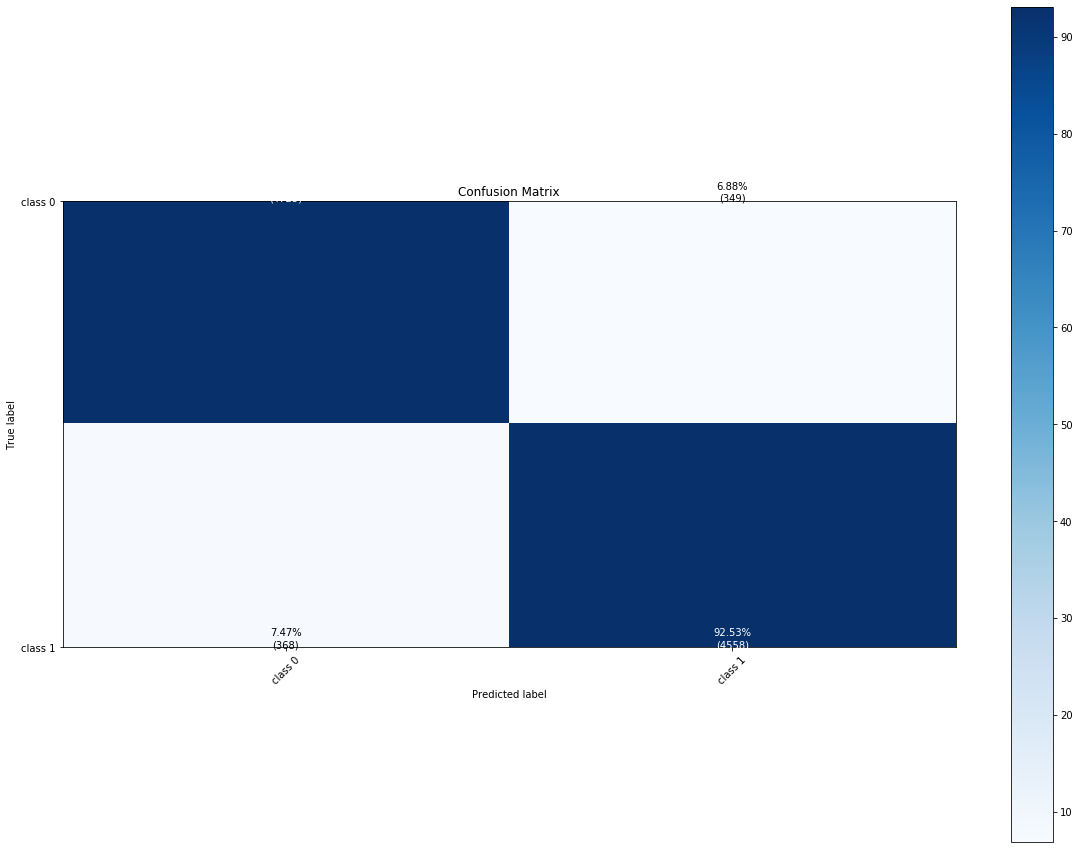

In [8]:
y_pred = model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)


## 9. Summerize 

In [9]:
# Summerize the model arhiteture and parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  7850      
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  22        
_________________________________________________________________
activation_1 (Activation)    multiple                  0         
Total params: 7,872
Trainable params: 7,872
Non-trainable params: 0
_________________________________________________________________


## 10. Save the Model with the Learned Weights

In [10]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


## 11. Load Saved Model

In [11]:
# load json and create model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
from tensorflow.keras import models

loaded_model = tensorflow.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


## 12. Predict using Loaded Model 

Normalized confusion matrix
[[93.1217974   6.8782026 ]
 [ 7.47056435 92.52943565]]
[[4725  349]
 [ 368 4558]]


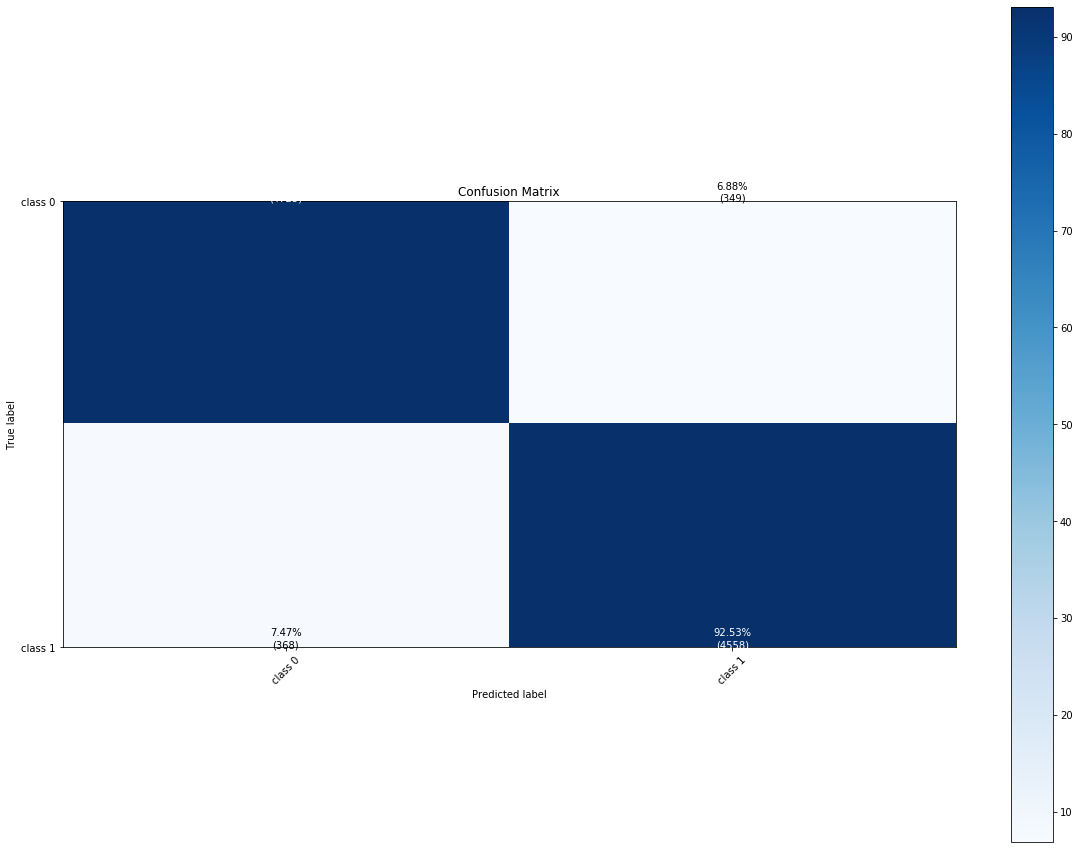

In [12]:
y_pred = loaded_model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)


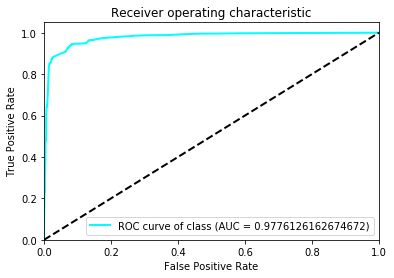

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test[:,0], y_pred[:,0])
roc_auc = auc(fpr, tpr)

# Plot all ROC curves
#colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'black', 'brown', 'purple', 'pink']
#for i, color in zip(range(num_of_clss), colors):
plt.plot(fpr, tpr, color='aqua', lw=lw,label='ROC curve of class (AUC = {0})' ''.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



In [14]:
y_test[:,]

array([[ True, False],
       [False,  True],
       [ True, False],
       ...,
       [False,  True],
       [ True, False],
       [False,  True]])